In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import dataset
path = "F:\intellipaat projects\Flight_Booking.csv"
df = pd.read_csv(path)

In [3]:
df.shape

(300153, 12)

In [4]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [5]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [6]:
# Dropping Unnamed column
df=df.drop(columns=["Unnamed: 0"])

In [7]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [9]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [10]:
# Categorical columns
object_columns = df.select_dtypes(include=['object'])
print(object_columns.dtypes)

count = len(object_columns.columns)
print("Number of categorical columns:", count)

airline             object
flight              object
source_city         object
departure_time      object
stops               object
arrival_time        object
destination_city    object
class               object
dtype: object
Number of categorical columns: 8


In [11]:
#numerical columns
numeric_columns = df.select_dtypes(include=['float', 'int'])
print(numeric_columns.dtypes)

count = len(numeric_columns.columns)
print("Number of numeric columns:", count)

duration     float64
days_left      int64
price          int64
dtype: object
Number of numeric columns: 3


In [13]:
# Select only categorical columns
categorical_columns = df.select_dtypes(include=['object'])

# Compute and display value counts for each categorical column
for column in categorical_columns:
    print(f"Value counts for {column}:")
    print(df[column].value_counts())
    print()


Value counts for airline:
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

Value counts for flight:
UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
SG-9923       1
6E-6474       1
6E-865        1
G8-705        1
G8-107        1
Name: flight, Length: 1561, dtype: int64

Value counts for source_city:
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64

Value counts for departure_time:
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64

Value counts for stops:
one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64

Value counts for arrival_time:
Night            91538
Evening          78323
Morn

# DATA CLEANING

In [14]:
# display unique, null values , null percent, data type
table = pd.DataFrame({'Unique':df.nunique(),'Null':df.isna().sum(),'NullPercent':df.isna().sum() / len(df),'Type':df.dtypes.values})
display(table)

,Unique,Null,NullPercent,Type
airline,6,0,0.0,object
flight,1561,0,0.0,object
source_city,6,0,0.0,object
departure_time,6,0,0.0,object
stops,3,0,0.0,object
arrival_time,6,0,0.0,object
destination_city,6,0,0.0,object
class,2,0,0.0,object
duration,476,0,0.0,float64
days_left,49,0,0.0,int64


In [16]:
df.duplicated().sum()

0

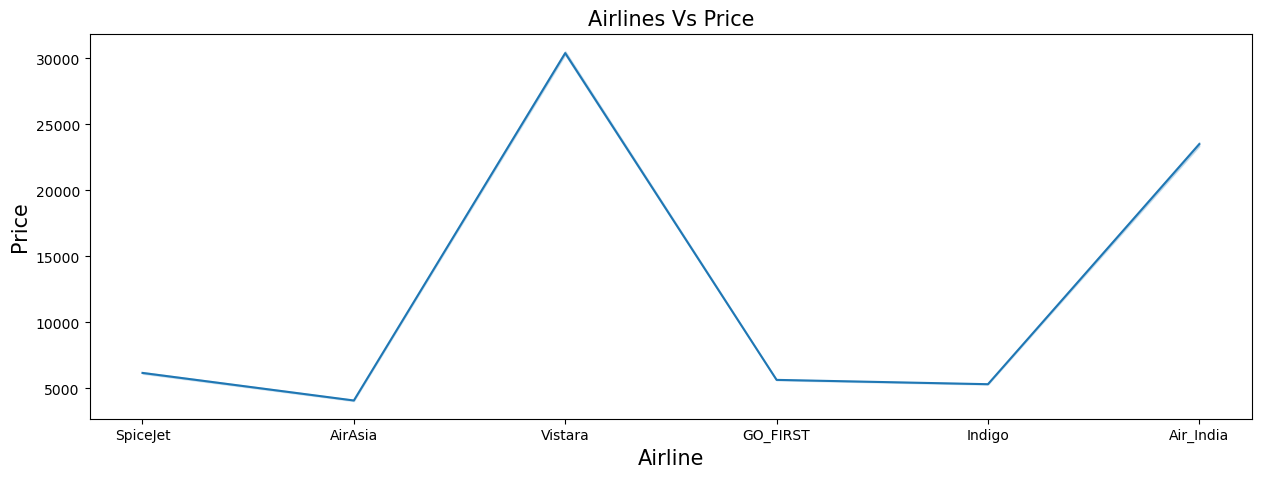

In [17]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df['airline'],y=df['price'])
plt.title('Airlines Vs Price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()
# there is a variation in price for different airlines

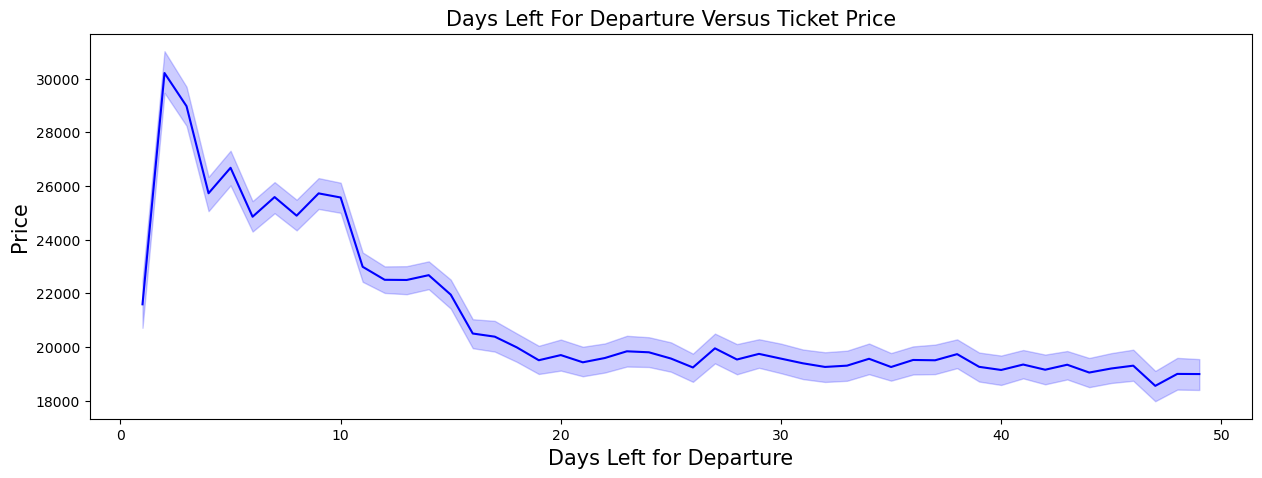

In [18]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df,x='days_left',y='price',color='blue')
plt.title('Days Left For Departure Versus Ticket Price',fontsize=15)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()
#The price of the ticket increases as the days left for departure decreases 


In [19]:
df["airline"].value_counts()

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

<Axes: xlabel='airline', ylabel='price'>

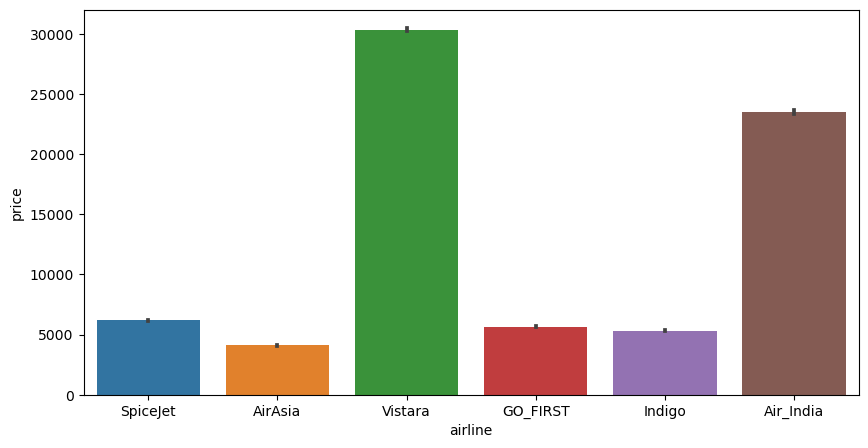

In [20]:
plt.figure(figsize=(10,5));
sns.barplot(x='airline',y='price',data=df)

<Axes: xlabel='class', ylabel='price'>

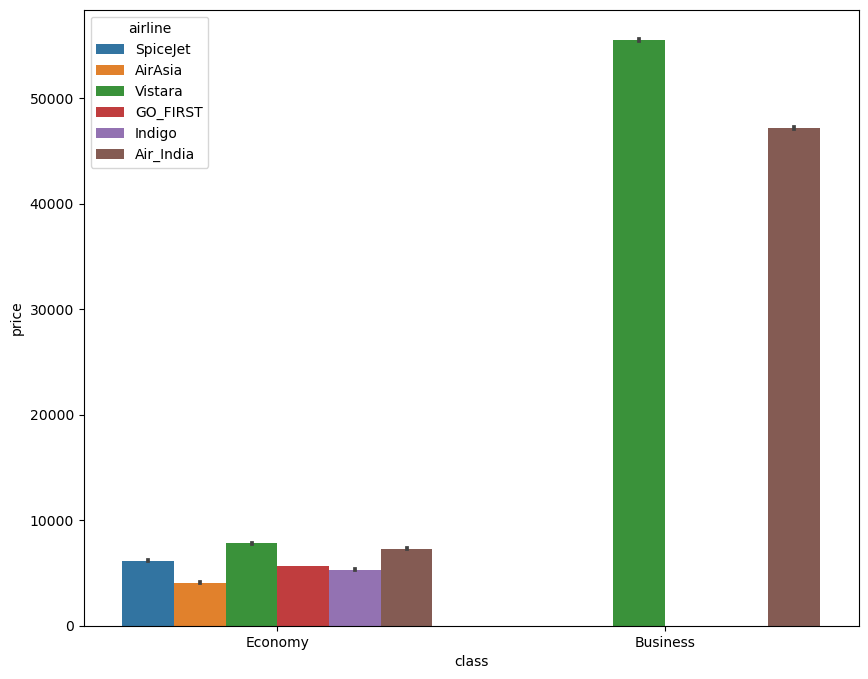

In [21]:
plt.figure(figsize=(10,8));
sns.barplot(x='class',y='price',data=df,hue='airline')

In [22]:
df.loc[(df["class"]=="Business") & (df["stops"]=="zero")].shape

(8102, 11)

In [24]:
df1=df.loc[(df["source_city"]=="Delhi") & (df["destination_city"]=="Mumbai")]
df1.describe()

,duration,days_left,price
count,15289.000000,15289.000000,15289.000000
mean,10.367774,25.828373,19355.829812
std,7.518482,13.675568,19777.253580
min,2.000000,1.000000,2281.000000
25%,3.830000,14.000000,4381.000000
50%,8.250000,26.000000,7262.000000
75%,15.170000,38.000000,36712.000000
max,30.080000,49.000000,95657.000000


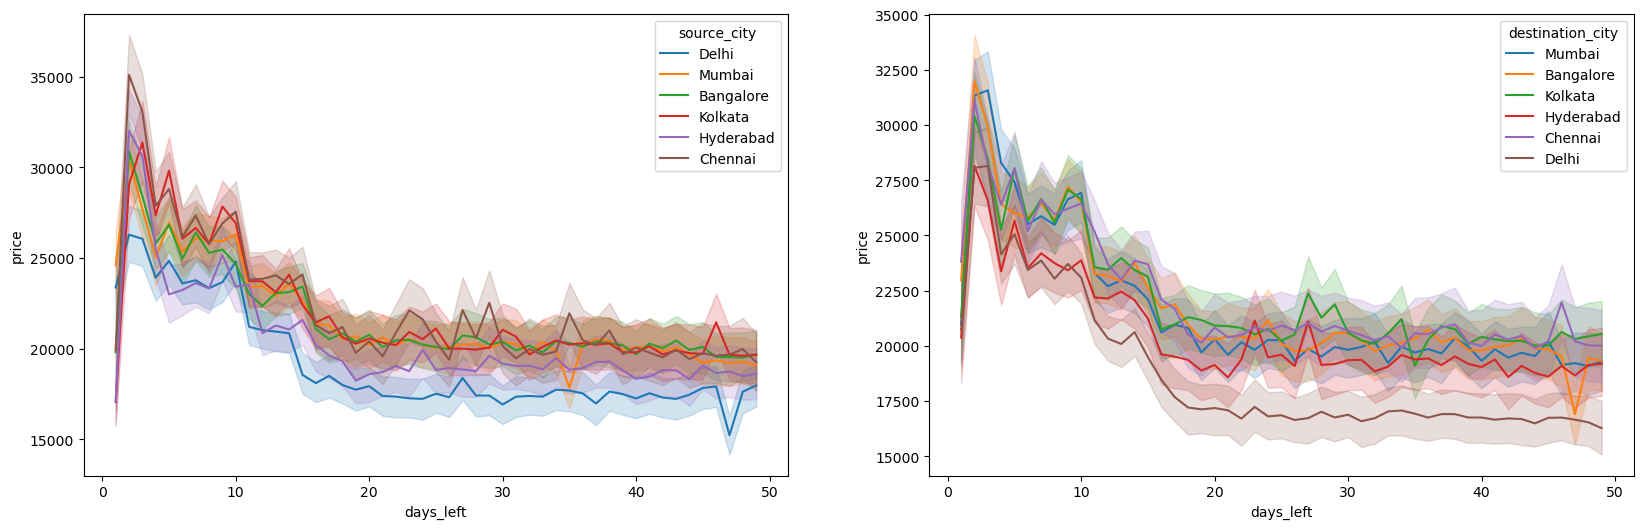

In [25]:
fig,ax=plt.subplots(1,2,figsize=(20,6))
sns.lineplot(x='days_left',y='price',data=df,hue='source_city',ax=ax[0])
sns.lineplot(x='days_left',y='price',data=df,hue='destination_city',ax=ax[1])
plt.show()

<Axes: xlabel='days_left', ylabel='price'>

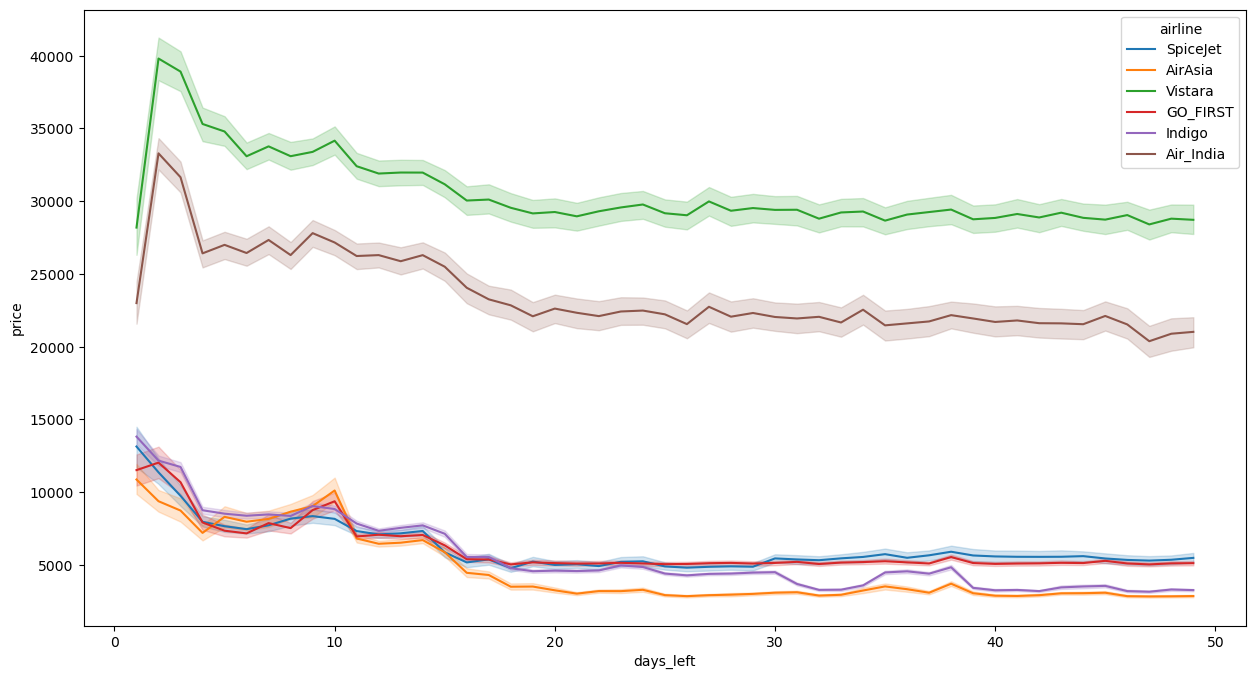

In [26]:
plt.figure(figsize=(15,8))
sns.lineplot(x='days_left',y='price',data=df,hue='airline')

<Axes: xlabel='destination_city', ylabel='price'>

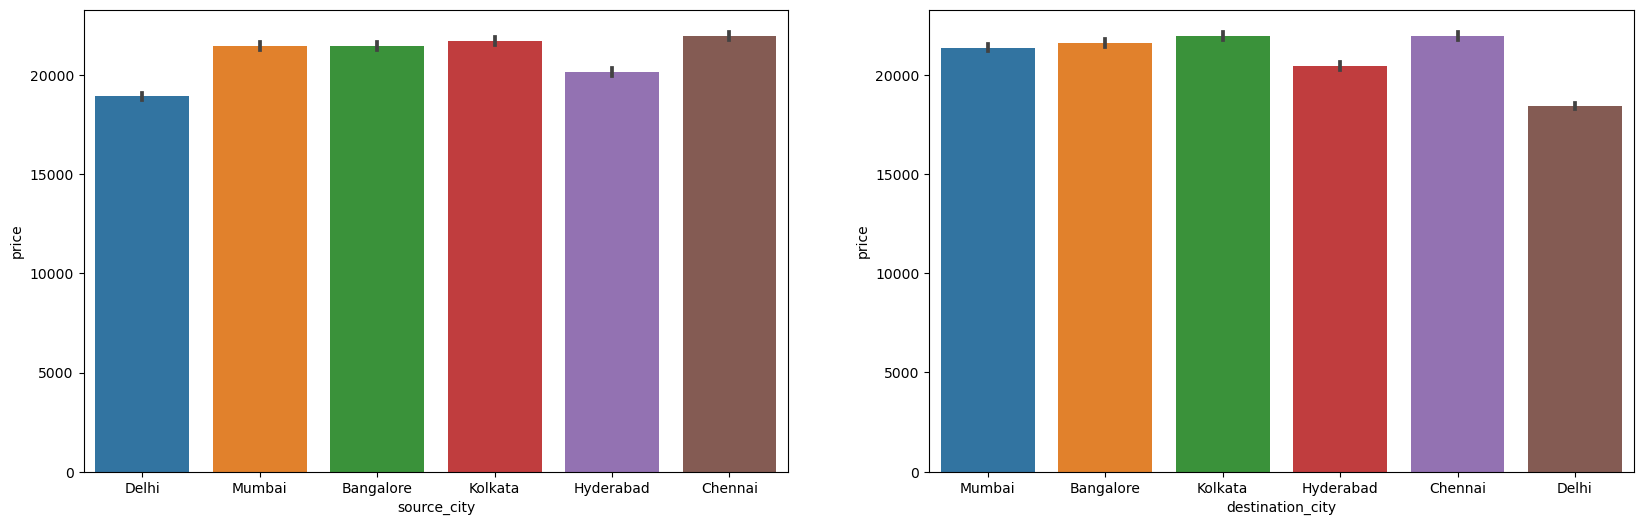

In [27]:
fig,ax=plt.subplots(1,2,figsize=(20,6))

sns.barplot(x='source_city',y='price',data=df,ax=ax[0])
sns.barplot(x='destination_city',y='price',data=df,ax=ax[1])

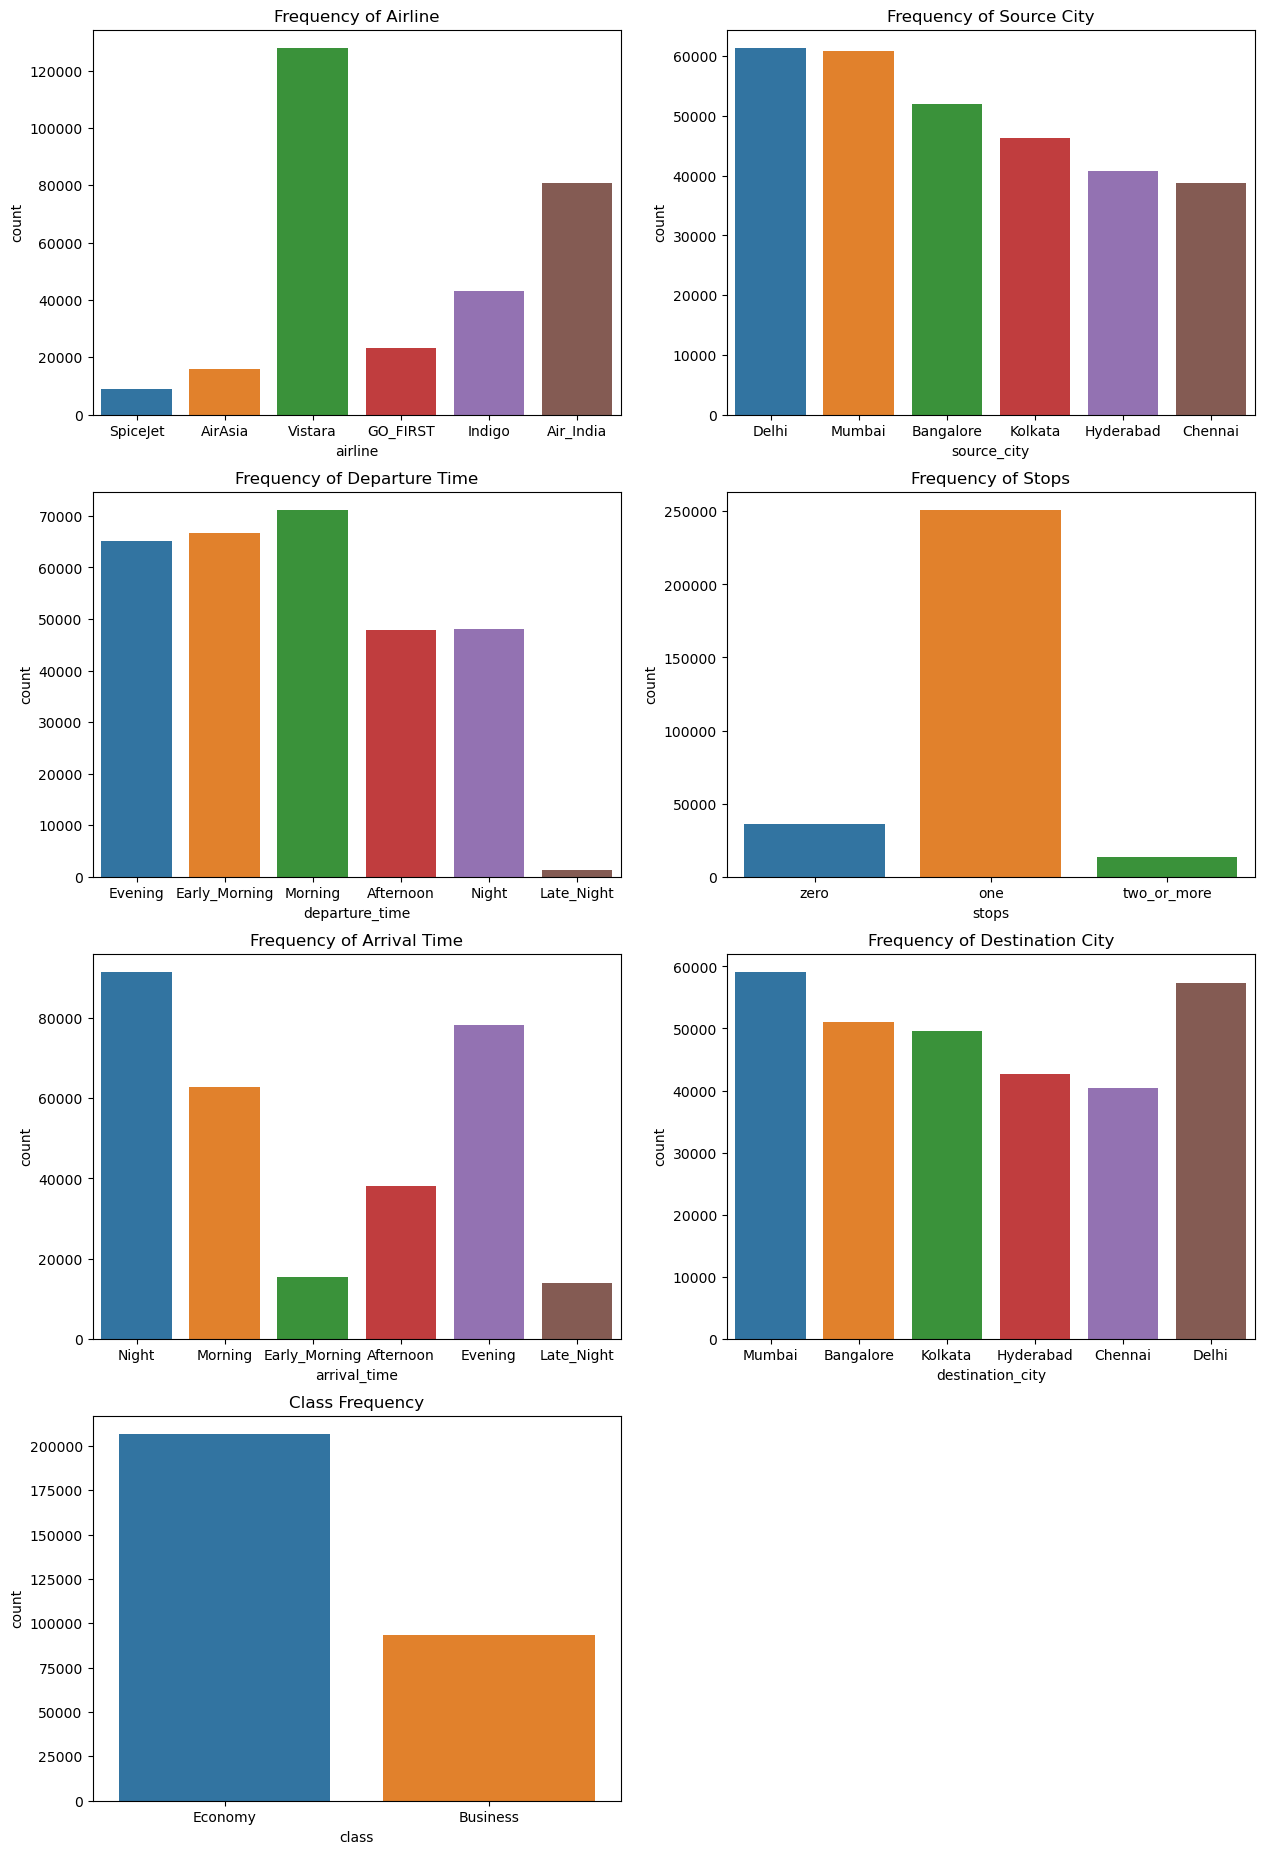

In [28]:
# Visualizations of categoric features with countplot
plt.figure(figsize=(15,23))

plt.subplot(4, 2, 1)
sns.countplot(x=df["airline"], data=df)
plt.title("Frequency of Airline")

plt.subplot(4, 2, 2)
sns.countplot(x=df["source_city"], data=df)
plt.title("Frequency of Source City")

plt.subplot(4, 2, 3)
sns.countplot(x=df["departure_time"], data=df)
plt.title("Frequency of Departure Time")

plt.subplot(4, 2, 4)
sns.countplot(x=df["stops"], data=df)
plt.title("Frequency of Stops")

plt.subplot(4, 2, 5)
sns.countplot(x=df["arrival_time"], data=df)
plt.title("Frequency of Arrival Time")

plt.subplot(4, 2, 6)
sns.countplot(x=df["destination_city"], data=df)
plt.title("Frequency of Destination City")

plt.subplot(4, 2, 7)
sns.countplot(x=df["class"], data=df)
plt.title("Class Frequency")

plt.show()

C:\Users\preet\AppData\Local\Temp\ipykernel_564\3959035813.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap="coolwarm")


<Axes: >

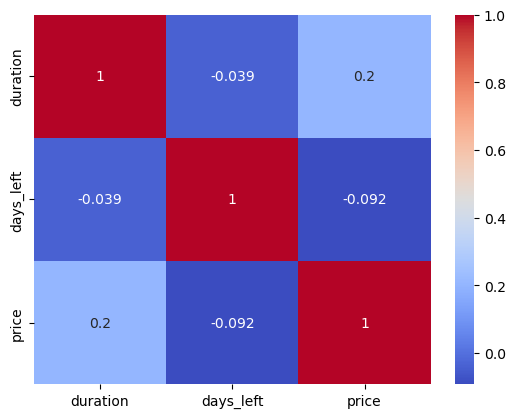

In [29]:
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

In [30]:
df["stops"]=df["stops"].replace(["zero","one","two_or_more"],[0,1,2])

In [31]:
df["stops"].value_counts()

1    250863
0     36004
2     13286
Name: stops, dtype: int64

C:\Users\preet\AppData\Local\Temp\ipykernel_564\3959035813.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap="coolwarm")


<Axes: >

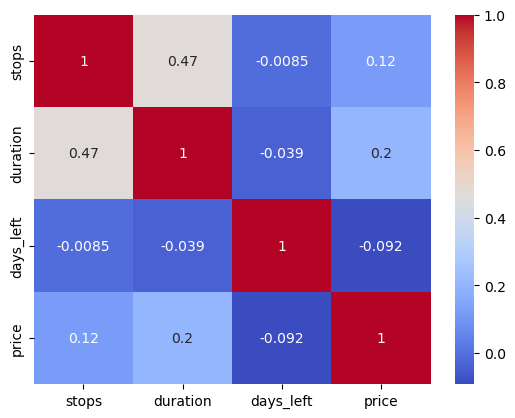

In [32]:
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

In [33]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["airline"]=le.fit_transform(df["airline"])
df["source_city"]=le.fit_transform(df["source_city"])
df["departure_time"]=le.fit_transform(df["departure_time"])
df["arrival_time"]=le.fit_transform(df["arrival_time"])
df["destination_city"]=le.fit_transform(df["destination_city"])
df["class"]=le.fit_transform(df["class"])

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  int32  
 3   departure_time    300153 non-null  int32  
 4   stops             300153 non-null  int64  
 5   arrival_time      300153 non-null  int32  
 6   destination_city  300153 non-null  int32  
 7   class             300153 non-null  int32  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int32(6), int64(3), object(1)
memory usage: 18.3+ MB


In [35]:
df=df.drop(columns=["flight"])

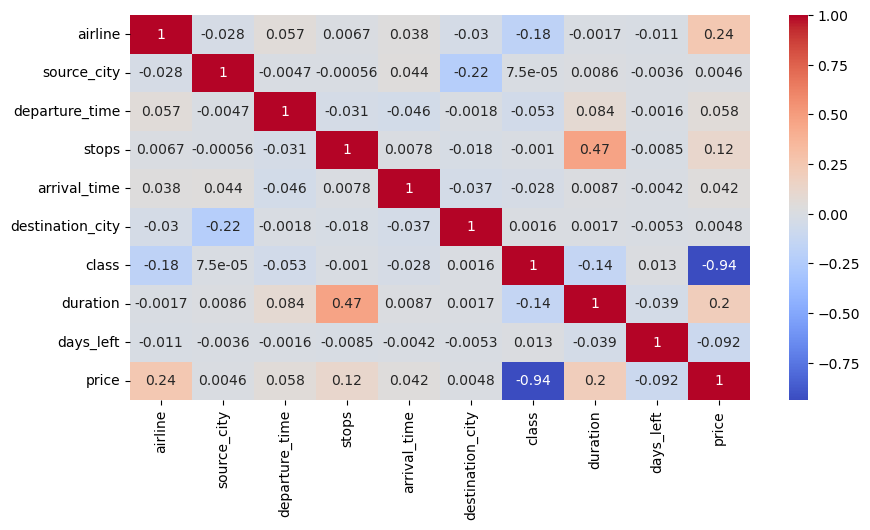

In [36]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.show()

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'price') ):
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
print(vif_data)

            feature       VIF
0           airline  3.461766
1       source_city  2.933064
2    departure_time  2.746367
3             stops  7.464236
4      arrival_time  3.684695
5  destination_city  2.893218
6             class  2.917521
7          duration  5.037943
8         days_left  4.035735


In [38]:
df=df.drop(columns=["stops"])

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'price') ):
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
print(vif_data)

            feature       VIF
0           airline  3.370020
1       source_city  2.895803
2    departure_time  2.746255
3      arrival_time  3.632792
4  destination_city  2.857808
5             class  2.776721
6          duration  3.429344
7         days_left  3.950132


In [40]:
X = df.drop(columns=["price"])
y = df['price'] 

In [44]:
# Split the data into training and testing sets
!pip install xgboost
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


     ---------------------------------------- 70.9/70.9 MB 5.4 MB/s eta 0:00:00


In [46]:
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    AdaBoostRegressor(),
    XGBRegressor()
]
# Fit and evaluate each model
for model in models:
    # Fit the model on the training set
    model.fit(X_train, y_train)


In [47]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'{type(model).__name__} - Mean Squared Error: {mse}')


XGBRegressor - Mean Squared Error: 13080449.947441373


In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate performance metrics                                                                                               
mse = mean_squared_error(y_test, y_pred)                                                                        
rmse = mean_squared_error(y_test, y_pred, squared=False)                                            
mae = mean_absolute_error(y_test, y_pred)                                                                            
r2 = r2_score(y_test, y_pred) 
# Print the performance metrics for each model                                                  
print(f"{type(model).__name__}:")                                                                                            
print(f" Mean Squared Error (MSE): {mse}")                                                                               
print(f" Root Mean Squared Error (RMSE): {rmse}")                                                           
print(f" Mean Absolute Error (MAE): {mae}")                                                                      
print(f" R-squared (R²) Score: {r2}") 
print()


XGBRegressor:
 Mean Squared Error (MSE): 13080449.947441373
 Root Mean Squared Error (RMSE): 3616.6904688459827
 Mean Absolute Error (MAE): 2088.342000507049
 R-squared (R²) Score: 0.9746248307301032

